# What is an anime, cartoon; using Nueral Networks 

## Imports

In [39]:
import os, shutil
import random

import time
import matplotlib.pyplot as plt
import scipy
import numpy as  np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
np.random.seed(75)

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications import InceptionResNetV2,DenseNet121,VGG19

from keras.callbacks import EarlyStopping

stopacc_epoch2 = EarlyStopping(monitor='accuracy',patience=2)
stopacc_epoch5 = EarlyStopping(monitor='accuracy',patience=5)
stoploss_epoch5 = EarlyStopping(monitor='val_loss',patience=5)


from keras import models
from keras import layers

import talos
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import load_model

## data

So you are free to change the structure and files. refer back to the read me for my methodology so you ahve reference but it is very straight forward.  source data is in the read me and this is the code structuring.

data manipulation has been moved to the "Mappings code"ipynb file!

In [3]:
#for reference and to explore data
anime_set='archive/Training Data/Anime'
cartoon_set='archive/Training Data/Cartoon'

In [4]:
main_photos= 'main_photos/'

### setting up the sub directory

train_set=os.path.join(main_photos,"train")
train_anime=os.path.join(train_set,"anime")
train_cartoon=os.path.join(train_set,"cartoon")

test_set=os.path.join(main_photos,"test")
test_anime=os.path.join(test_set,"anime")
test_cartoon=os.path.join(test_set,"cartoon")

## file manipulation is over, base model!

### formating images 

In [5]:
print(len(os.listdir(train_set)))

print(len(os.listdir(test_set)))

print(len(os.listdir(train_anime)))

print(len(os.listdir(test_anime)))

print(len(os.listdir(train_cartoon)))

print(len(os.listdir(test_cartoon)))

2
2
4447
310
4445
323


In [6]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_set, 
        target_size=(64, 64), batch_size = 300) 

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_set, 
        target_size=(64, 64), batch_size = 4147)

Found 633 images belonging to 2 classes.
Found 8892 images belonging to 2 classes.


In [7]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

In [8]:
test_generator2 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_set, 
        target_size=(500, 500), batch_size = 300) 

train_generator2 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_set, 
        target_size=(500, 500), batch_size = 4147)

Found 633 images belonging to 2 classes.
Found 8892 images belonging to 2 classes.


In [9]:
train_imagespic, train_labelspic = next(train_generator2)
test_imagespic, test_labelspic = next(test_generator2)

### example images 

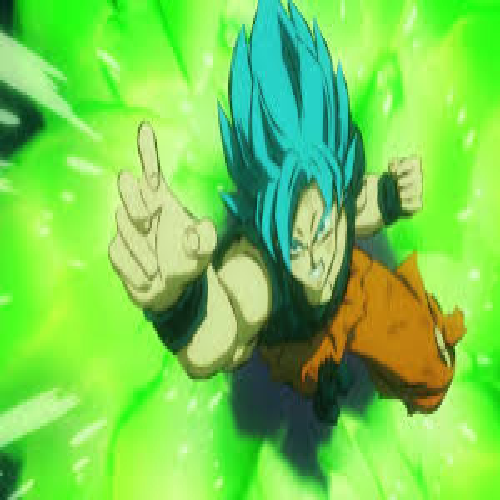

In [10]:
array_to_img(train_imagespic[50])

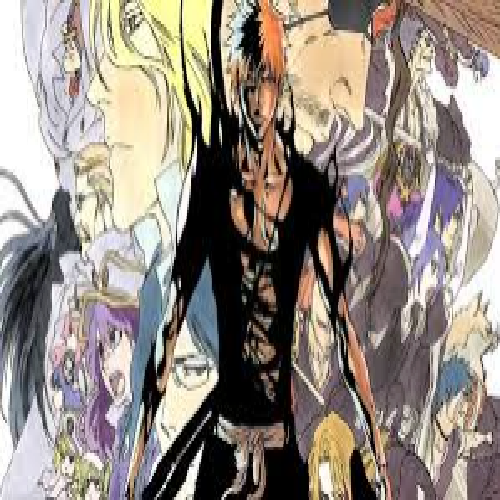

In [11]:
array_to_img(train_imagespic[301])

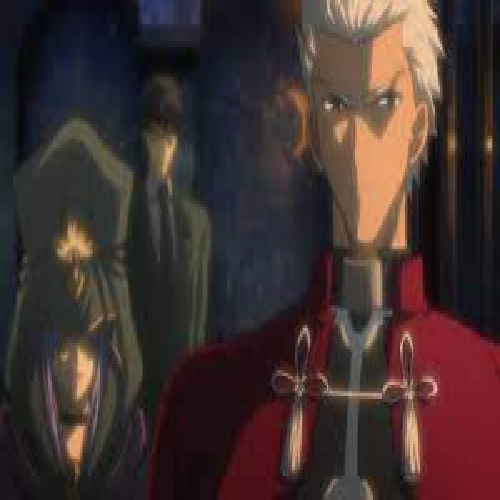

In [12]:
array_to_img(train_imagespic[91])

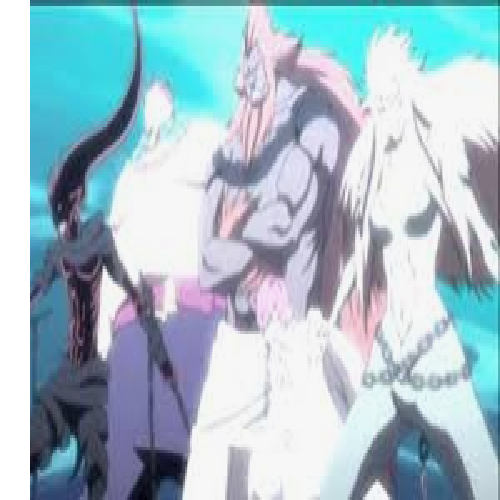

In [13]:
array_to_img(train_imagespic[1021])

### shape of data coming out

In [14]:
train_images.shape

(4147, 64, 64, 3)

In [15]:
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]


print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))

Number of training samples: 4147
Number of testing samples: 300
train_images shape: (4147, 64, 64, 3)
train_labels shape: (4147, 2)
test_images shape: (300, 64, 64, 3)
test_labels shape: (300, 2)


In [16]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)

train_y = np.reshape(train_labels[:,0], (4147,1))
test_y = np.reshape(test_labels[:,0], (300,1))

(4147, 12288)
(300, 12288)


In [17]:
def makelosstraining(modelob):
    if 'accuracy' in modelob.history.keys():
        training_loss = modelob.history['loss']
        test_loss = modelob.history['val_loss']

        training_acc = modelob.history['accuracy']
        test_acc = modelob.history['val_accuracy']

        # Create count of the number of epochs
        epoch_count = range(1, len(training_loss) + 1)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

        # Visualize loss history
        ax1.plot(epoch_count, training_loss, 'r--')
        ax1.plot(epoch_count, test_loss, 'b-')
        ax1.legend(['Training Loss', 'Test Loss'])

        # Visualize accuracy  history
        ax2.plot(epoch_count, training_acc, 'r--')
        ax2.plot(epoch_count, test_acc, 'b-')
        ax2.legend(['Training Accuracy', 'Test Accuracy'])

        fig.show();
    else:
        training_loss = modelob.history['loss']
        test_loss = modelob.history['val_loss']

        training_acc = modelob.history['acc']
        test_acc = modelob.history['val_acc']

        # Create count of the number of epochs
        epoch_count = range(1, len(training_loss) + 1)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

        # Visualize loss history
        ax1.plot(epoch_count, training_loss, 'r--')
        ax1.plot(epoch_count, test_loss, 'b-')
        ax1.legend(['Training Loss', 'Test Loss'])

        # Visualize accuracy  history
        ax2.plot(epoch_count, training_acc, 'r--')
        ax2.plot(epoch_count, test_acc, 'b-')
        ax2.legend(['Training Accuracy', 'Test Accuracy'])

        fig.show();

# setting up base model!

In [18]:
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(12288,)))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

histoire = model.fit(train_img,
                    train_y,
                    epochs=100,
                    batch_size=32,callbacks=[stopacc_epoch2],
                    validation_data=(test_img, test_y))

Epoch 1/100
130/130 [==============================] - 1s 6ms/step - loss: 0.6828 - accuracy: 0.5551 - val_loss: 0.6775 - val_accuracy: 0.5800
Epoch 2/100
130/130 [==============================] - 1s 4ms/step - loss: 0.6691 - accuracy: 0.5898 - val_loss: 0.6686 - val_accuracy: 0.5900
Epoch 3/100
130/130 [==============================] - 1s 4ms/step - loss: 0.6586 - accuracy: 0.6173 - val_loss: 0.6938 - val_accuracy: 0.5733
Epoch 4/100
130/130 [==============================] - 0s 4ms/step - loss: 0.6482 - accuracy: 0.6277 - val_loss: 0.6831 - val_accuracy: 0.5867
Epoch 5/100
130/130 [==============================] - 1s 5ms/step - loss: 0.6387 - accuracy: 0.6243 - val_loss: 0.6608 - val_accuracy: 0.6133
Epoch 6/100
130/130 [==============================] - 1s 5ms/step - loss: 0.6341 - accuracy: 0.6388 - val_loss: 0.6374 - val_accuracy: 0.6267
Epoch 7/100
130/130 [==============================] - 1s 4ms/step - loss: 0.6248 - accuracy: 0.6475 - val_loss: 0.6578 - val_accuracy: 0.6100

In [20]:
results_train = model.evaluate(train_img, train_y)

130/130 [==============================] - 0s 2ms/step - loss: 0.5485 - accuracy: 0.7152


In [21]:
results_test = model.evaluate(test_img, test_y)

10/10 [==============================] - 0s 2ms/step - loss: 0.6023 - accuracy: 0.6700


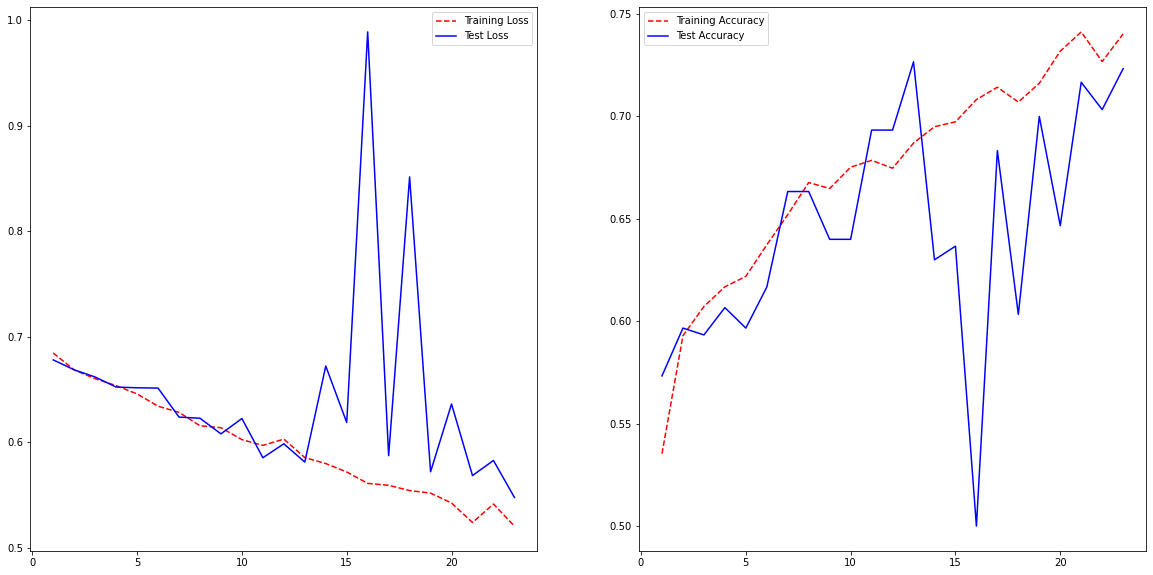

In [71]:
makelosstraining(histoire)

this is not bad but lets see if we can imporve it with dropping.

In [72]:
modeldrop = models.Sequential()
modeldrop.add(layers.Dense(20, activation='relu', input_shape=(12288,)))
modeldrop.add(layers.Dense(200, activation='relu'))
modeldrop.add(Dropout(0.3))
modeldrop.add(layers.Dense(500, activation='relu'))
modeldrop.add(layers.Dense(1, activation='sigmoid'))

In [73]:
modeldrop.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

histoiredrop = modeldrop.fit(train_img,
                    train_y,
                    epochs=100,
                    batch_size=32,
                    validation_data=(test_img, test_y))

Epoch 1/100
130/130 [==============================] - 1s 4ms/step - loss: 0.6873 - accuracy: 0.5303 - val_loss: 0.6833 - val_accuracy: 0.5500
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.5650 - val_loss: 0.6851 - val_accuracy: 0.5133
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 0.6691 - accuracy: 0.5954 - val_loss: 0.6663 - val_accuracy: 0.5833
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 0.6600 - accuracy: 0.6041 - val_loss: 0.6709 - val_accuracy: 0.5667
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 0.6531 - accuracy: 0.6094 - val_loss: 0.6398 - val_accuracy: 0.6333
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 0.6434 - accuracy: 0.6337 - val_loss: 0.6313 - val_accuracy: 0.6600
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 0.6386 - accuracy: 0.6395 - val_loss: 0.6625 - val_accuracy: 0.5867

Epoch 58/100
130/130 [==============================] - 0s 3ms/step - loss: 0.3580 - accuracy: 0.8430 - val_loss: 0.5136 - val_accuracy: 0.7633
Epoch 59/100
130/130 [==============================] - 0s 3ms/step - loss: 0.3554 - accuracy: 0.8469 - val_loss: 0.5435 - val_accuracy: 0.7333
Epoch 60/100
130/130 [==============================] - 0s 3ms/step - loss: 0.3713 - accuracy: 0.8324 - val_loss: 0.5501 - val_accuracy: 0.7433
Epoch 61/100
130/130 [==============================] - 0s 3ms/step - loss: 0.3524 - accuracy: 0.8428 - val_loss: 0.7259 - val_accuracy: 0.7067
Epoch 62/100
130/130 [==============================] - 0s 3ms/step - loss: 0.3903 - accuracy: 0.8283 - val_loss: 0.6946 - val_accuracy: 0.6900
Epoch 63/100
130/130 [==============================] - 0s 3ms/step - loss: 0.3855 - accuracy: 0.8249 - val_loss: 0.5757 - val_accuracy: 0.7200
Epoch 64/100
130/130 [==============================] - 0s 3ms/step - loss: 0.3516 - accuracy: 0.8452 - val_loss: 0.5737 - val_accuracy:

In [74]:
results_train = modeldrop.evaluate(train_img, train_y)

130/130 [==============================] - 0s 1ms/step - loss: 0.4539 - accuracy: 0.7736


In [75]:
results_test = modeldrop.evaluate(test_img, test_y)

10/10 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.7033


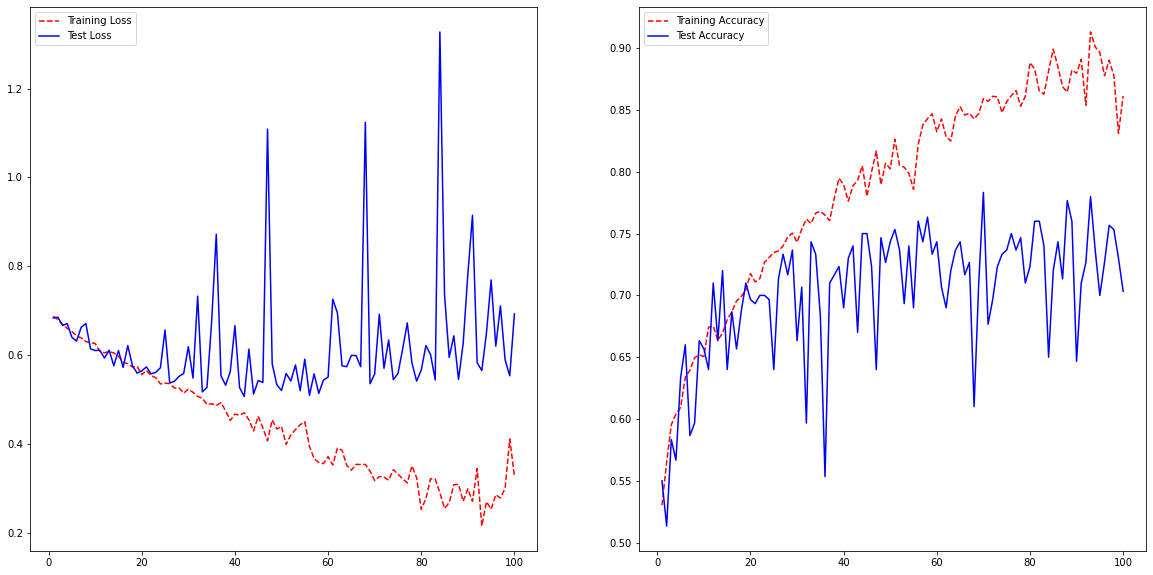

In [76]:
makelosstraining(histoiredrop)

Okay! so we saw that the first NN was okay on the train set and not the test.  which is not good if we want to run predictions.  I tried applying drop out layers to see if that would help with prediction. but it just made the gap higher.  Lets add a grid search to see what affect that has and remove the dropout feature.

# grid search 

In [77]:
def dense_network(x_train, y_train, x_test, y_test, params):

    # we build the model exactly like we would normally do it
    model = Sequential()

    # hidden layers
    
    model.add(layers.Dense(params['nodes1'], activation='relu', input_shape=(12288,)))
    model.add(layers.Dropout(params['dropout']))
    model.add(layers.Dense(params['nodes1'], activation=params['activation1'], input_shape=(12288,)))
    
    model.add(layers.Dense(params['nodes1'], activation=params['activation1']))
    model.add(layers.Dense(params['nodes1'], activation=params['activation1']))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # output layer
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=params['optimizer'], metrics=['accuracy'])
    
    out = model.fit(x_train, y_train, 
                        validation_data=(x_test, y_test),
                        batch_size=50,
                        epochs=100,
                        verbose=0)

    return out, model

In [78]:
params = {'dropout': [0.1, 0.3, 0.5,0], 
          'nodes1': [100, 200, 500],
          'optimizer': ['adam', 'sgd'], #,'Adagrad','Adamax' 
          'activation1': ['relu', 'tanh'], #,'selu'
          'activation2': ['relu', 'tanh']}

In [79]:
results = talos.Scan(train_img, train_y, params=params, model=dense_network, experiment_name='grid')



  0%|          | 0/72 [2:16:31<?, ?it/s]A


  1%|          | 1/96 [00:56<1:28:44, 56.05s/it]

  2%|▏         | 2/96 [01:45<1:24:56, 54.21s/it]

  3%|▎         | 3/96 [03:11<1:38:31, 63.57s/it]

  4%|▍         | 4/96 [04:22<1:40:50, 65.77s/it]

  5%|▌         | 5/96 [07:16<2:29:13, 98.39s/it]

  6%|▋         | 6/96 [09:38<2:47:10, 111.45s/it]

  7%|▋         | 7/96 [10:33<2:20:07, 94.47s/it] 

  8%|▊         | 8/96 [11:23<1:58:54, 81.07s/it]

  9%|▉         | 9/96 [12:48<1:59:11, 82.21s/it]

 10%|█         | 10/96 [14:00<1:53:42, 79.34s/it]

 11%|█▏        | 11/96 [16:50<2:30:51, 106.48s/it]

 12%|█▎        | 12/96 [19:09<2:42:46, 116.27s/it]

 14%|█▎        | 13/96 [20:03<2:14:44, 97.40s/it] 

 15%|█▍        | 14/96 [20:47<1:51:24, 81.51s/it]

 16%|█▌        | 15/96 [22:07<1:49:11, 80.89s/it]

 17%|█▋        | 16/96 [23:16<1:43:12, 77.41s/it]

 18%|█▊        | 17/96 [26:07<2:19:08, 105.68s/it]

 19%|█▉        | 18/96 [28:27<2:30:35, 115.84s/it]

 20%|█▉        | 19/96 [29:19<2:04:02,

In [97]:
results.best_model(metric='accuracy')

In [98]:
pd.read_csv('grid/111121195816.csv').sort_values('val_accuracy', ascending=False)

,round_epochs,loss,accuracy,val_loss,val_accuracy,activation1,activation2,dropout,nodes1,optimizer
39,100,0.653634,0.645072,0.700199,0.525301,tanh,relu,0.1,200,sgd
47,100,0.590936,0.718470,0.706454,0.518072,tanh,relu,0.3,500,sgd
61,100,0.644454,0.635768,0.713959,0.518072,tanh,tanh,0.3,100,sgd
9,100,0.668681,0.620951,0.697547,0.517269,relu,relu,0.3,200,sgd
37,100,0.636784,0.664025,0.713970,0.517269,tanh,relu,0.1,100,sgd
...,...,...,...,...,...,...,...,...,...,...
21,100,0.625498,0.671606,0.803649,0.488353,relu,tanh,0.1,200,sgd
17,100,0.686342,0.550655,0.697478,0.486747,relu,relu,0.5,500,sgd
49,100,0.646202,0.651620,0.708507,0.485141,tanh,relu,0.5,100,sgd
57,100,0.627040,0.657822,0.722933,0.475502,tanh,tanh,0.1,200,sgd


I wa sactually expeting this do perform a bit better but it seems some of the parameter changes have reduced the val_accuracy. The over fitting problem is still and issue so I decided to run a CNN(convolutional neural network).  They are know to perform better since we are taking an average value of a proximity of grid values.

I am going to preemptivily add stop losing because as I was iterating I was running into the over fitting issue again! s it is set to a stop of 5. which mean that after 5 epochs of not improving, the model will stop training and use that model so hopefully we get better predict result.

# Building CCN model

In [22]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(32, (4, 4), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [23]:
history2 = model2.fit(train_images,
                    train_y,
                    epochs=100,
                    batch_size=32,callbacks=[stoploss_epoch5],
                     validation_data=(test_images, test_y))

Epoch 1/100
130/130 [==============================] - 8s 63ms/step - loss: 0.6909 - acc: 0.5223 - val_loss: 0.6862 - val_acc: 0.5233
Epoch 2/100
130/130 [==============================] - 8s 62ms/step - loss: 0.6846 - acc: 0.5524 - val_loss: 0.6839 - val_acc: 0.5267
Epoch 3/100
130/130 [==============================] - 8s 63ms/step - loss: 0.6752 - acc: 0.5845 - val_loss: 0.6676 - val_acc: 0.6500
Epoch 4/100
130/130 [==============================] - 8s 62ms/step - loss: 0.6626 - acc: 0.6207 - val_loss: 0.6573 - val_acc: 0.5700
Epoch 5/100
130/130 [==============================] - 8s 62ms/step - loss: 0.6463 - acc: 0.6284 - val_loss: 0.6430 - val_acc: 0.5800
Epoch 6/100
130/130 [==============================] - 9s 67ms/step - loss: 0.6237 - acc: 0.6540 - val_loss: 0.6827 - val_acc: 0.5533
Epoch 7/100
130/130 [==============================] - 9s 66ms/step - loss: 0.6030 - acc: 0.6824 - val_loss: 0.5694 - val_acc: 0.7267
Epoch 8/100
130/130 [==============================] - 8s 65ms

In [40]:
results_test = model2.evaluate(train_images, train_y)

130/130 [==============================] - 2s 13ms/step - loss: 0.4747 - acc: 0.7753


In [25]:
results_test = model2.evaluate(test_images, test_y)

10/10 [==============================] - 0s 12ms/step - loss: 0.4485 - acc: 0.7933


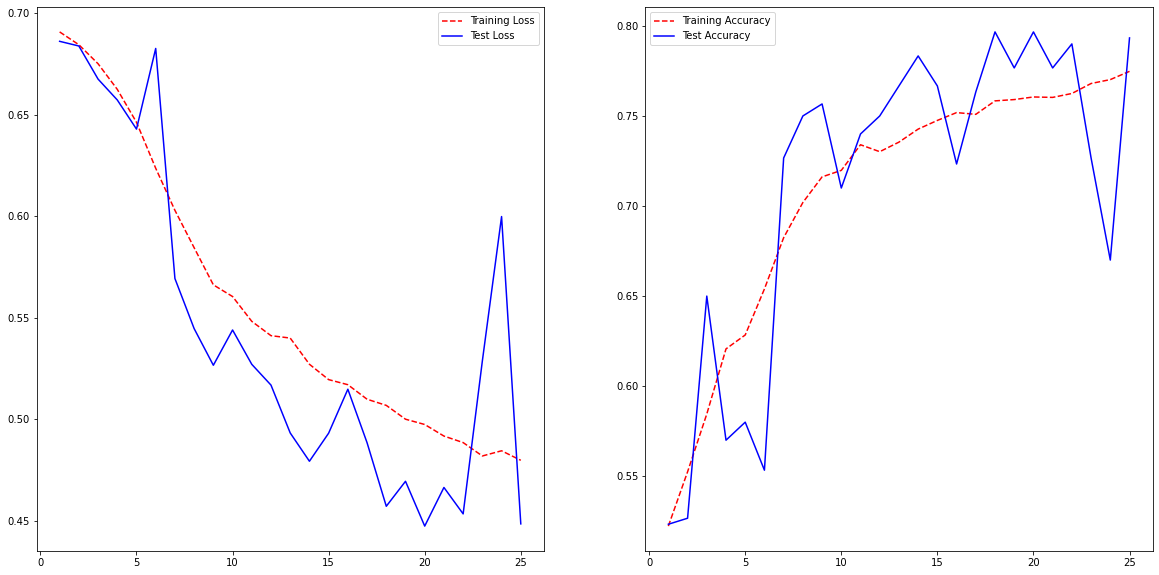

In [26]:
makelosstraining(history2)

Even tho we got a weaker performance from th training set with a differnce of .02, we did get a pretty good lift on the accruracy of the test model. Now we are at .76, so def better we  can approve upon this model. but lets see what else we can do. 

lets see if pretrained networks work better. They have been battle tested and published for the world to use so they may be built better for this image classification class.

VGG19 was a standard one commonly used but I did some research on models for media and InceptionResNetV2 was used to a good effect.

# lets add pre trained networks

In [27]:
pretrainedincep = InceptionResNetV2(weights='imagenet', 
                 include_top=False, 
                 input_shape=(75, 75, 3))


pretraineddense = VGG19(weights='imagenet', 
                 include_top=False, 
                 input_shape=(75, 75, 3))

In [28]:
pretraineddense.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 75, 75, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 75, 75, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 75, 75, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 37, 37, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 37, 37, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 37, 37, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 18, 18, 128)       0     

In [29]:
PD_cnn = Sequential()
PD_cnn.add(pretraineddense)

PI_cnn = Sequential()
PI_cnn.add(pretrainedincep)

for layer in PD_cnn.layers:
    layer.trainable=False
    
for layer in PI_cnn.layers:
    layer.trainable=False

In [30]:
# checking to see it it is a flat layer
for layer in PD_cnn.layers:
    print(layer.name, layer.trainable)
for layer in PI_cnn.layers:
    print(layer.name, layer.trainable)

vgg19 False
inception_resnet_v2 False


In [31]:
PD_cnn.add(Flatten())
PD_cnn.add(Dense(132, activation='relu'))
PD_cnn.add(Dense(500, activation='relu'))
PD_cnn.add(Dense(200, activation='relu'))
PD_cnn.add(Dense(500, activation='relu'))



PD_cnn.add(Dense(1, activation='sigmoid'))

In [32]:
test_generator3 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_set, 
        target_size=(75, 75), batch_size = 300) 

train_generator3 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_set, 
        target_size=(75, 75), batch_size = 4147)

Found 633 images belonging to 2 classes.
Found 8892 images belonging to 2 classes.


In [33]:
test_images3, test_labels3 = next(test_generator3)

In [34]:
train_images3, train_labels3 = next(train_generator3)

In [41]:
train_y3 = np.reshape(train_labels3[:,0], (4147,1))
test_y3 = np.reshape(test_labels3[:,0], (300,1))

In [42]:
PD_cnn.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history3 = PD_cnn.fit(train_images3,
                    train_y3,
                    epochs=100,
                    batch_size=32,callbacks=[stoploss_epoch5],
                     validation_data=(test_images3, test_y3))

Epoch 1/100
130/130 [==============================] - 54s 412ms/step - loss: 0.4008 - accuracy: 0.8177 - val_loss: 0.5193 - val_accuracy: 0.7433
Epoch 2/100
130/130 [==============================] - 55s 426ms/step - loss: 0.4025 - accuracy: 0.8177 - val_loss: 0.3940 - val_accuracy: 0.8133
Epoch 3/100
130/130 [==============================] - 53s 408ms/step - loss: 0.3903 - accuracy: 0.8240 - val_loss: 0.3668 - val_accuracy: 0.8433
Epoch 4/100
130/130 [==============================] - 53s 407ms/step - loss: 0.3874 - accuracy: 0.8206 - val_loss: 0.3597 - val_accuracy: 0.8467
Epoch 5/100
130/130 [==============================] - 54s 413ms/step - loss: 0.3830 - accuracy: 0.8247 - val_loss: 0.3863 - val_accuracy: 0.8367
Epoch 6/100
130/130 [==============================] - 54s 418ms/step - loss: 0.3819 - accuracy: 0.8261 - val_loss: 0.4694 - val_accuracy: 0.7567
Epoch 7/100
130/130 [==============================] - 53s 407ms/step - loss: 0.3713 - accuracy: 0.8353 - val_loss: 0.3977 -

In [43]:
results_test = PD_cnn.evaluate(train_images3, train_y3)

130/130 [==============================] - 46s 353ms/step - loss: 0.3344 - accuracy: 0.8568


In [44]:
results_test = PD_cnn.evaluate(test_images3, test_y3)

10/10 [==============================] - 3s 302ms/step - loss: 0.3761 - accuracy: 0.8267


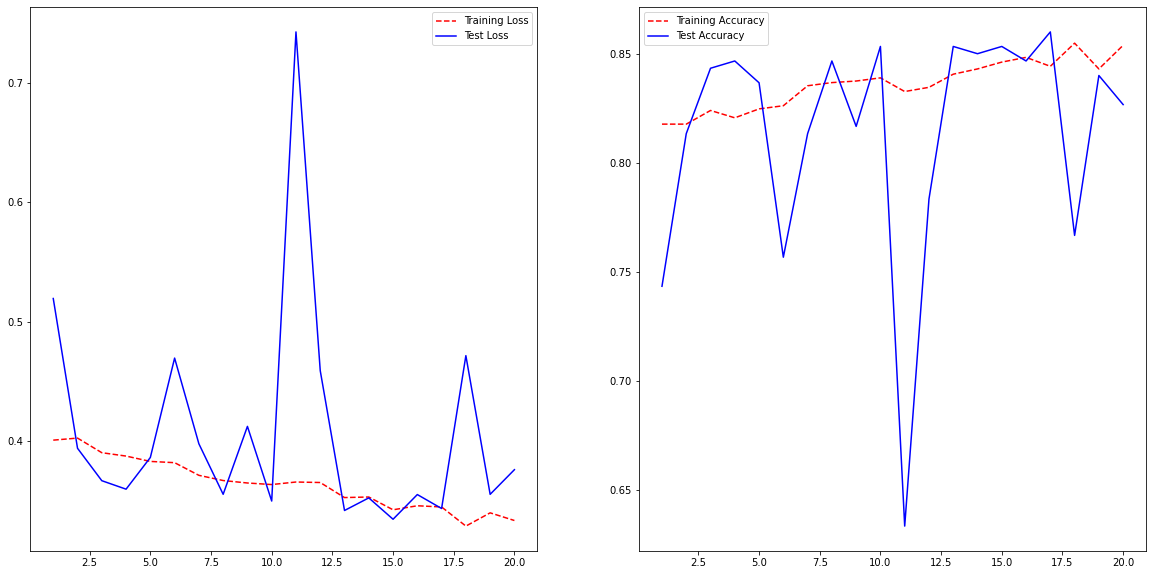

In [45]:
makelosstraining(history3)

In [46]:
PI_cnn.add(Flatten())
PI_cnn.add(Dense(132, activation='relu'))
PI_cnn.add(Dense(50, activation='relu'))
PI_cnn.add(Dense(75, activation='relu'))
PI_cnn.add(Dense(1, activation='sigmoid'))

In [47]:
test_generator4 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_set, 
        target_size=(75, 75), batch_size = 300) 

train_generator4 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_set, 
        target_size=(75, 75), batch_size = 4147)

Found 633 images belonging to 2 classes.
Found 8892 images belonging to 2 classes.


In [48]:
test_images4, test_labels4 = next(test_generator4)

In [49]:
train_images4, train_labels4 = next(train_generator4)

In [50]:
train_y4 = np.reshape(train_labels4[:,0], (4147,1))
test_y4 = np.reshape(test_labels4[:,0], (300,1))

In [51]:
PI_cnn.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history4 = PI_cnn.fit(train_images4,
                    train_y4,
                    epochs=100,
                    batch_size=32,callbacks=[stoploss_epoch5],
                     validation_data=(test_images4, test_y4))

Epoch 1/100
130/130 [==============================] - 33s 255ms/step - loss: 0.5685 - accuracy: 0.7126 - val_loss: 0.4805 - val_accuracy: 0.7933
Epoch 2/100
130/130 [==============================] - 28s 218ms/step - loss: 0.4711 - accuracy: 0.7955 - val_loss: 0.4473 - val_accuracy: 0.8133
Epoch 3/100
130/130 [==============================] - 28s 218ms/step - loss: 0.4304 - accuracy: 0.8124 - val_loss: 0.4328 - val_accuracy: 0.8133
Epoch 4/100
130/130 [==============================] - 28s 218ms/step - loss: 0.4028 - accuracy: 0.8240 - val_loss: 0.3952 - val_accuracy: 0.8400
Epoch 5/100
130/130 [==============================] - 29s 225ms/step - loss: 0.3692 - accuracy: 0.8425 - val_loss: 0.3751 - val_accuracy: 0.8467
Epoch 6/100
130/130 [==============================] - 29s 221ms/step - loss: 0.3504 - accuracy: 0.8536 - val_loss: 0.3777 - val_accuracy: 0.8267
Epoch 7/100
130/130 [==============================] - 28s 218ms/step - loss: 0.3281 - accuracy: 0.8594 - val_loss: 0.3664 -

In [52]:
results_test = PI_cnn.evaluate(train_images4, train_y4)

130/130 [==============================] - 26s 204ms/step - loss: 0.0945 - accuracy: 0.9694


In [53]:
results_test = PI_cnn.evaluate(test_images4, test_y4)

10/10 [==============================] - 2s 175ms/step - loss: 0.3052 - accuracy: 0.8833


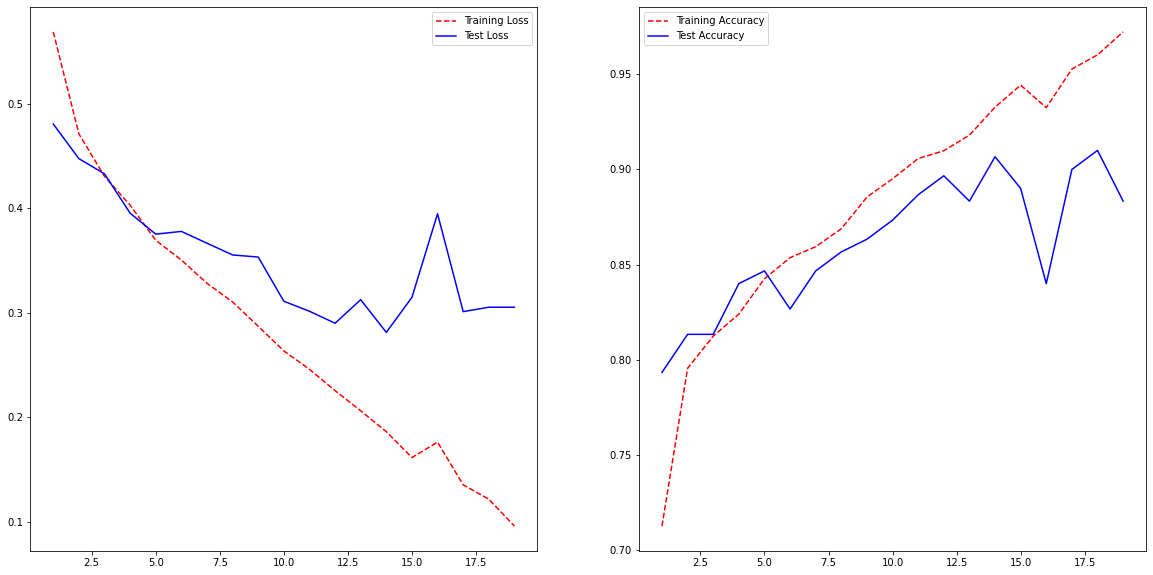

In [54]:
makelosstraining(history4)

In [55]:
from sklearn.metrics import confusion_matrix

In [120]:
test_labels4

NameError: name 'test_labels4' is not defined

# implementing grid search

In [ ]:
def dense_network(x_train, y_train, x_test, y_test, params):

    # we build the model exactly like we would normally do it
    model = Sequential()

    # hidden layers
    
    model.add(layers.Dense(params['nodes1'], activation='relu', input_shape=(12288,)))
    model.add(layers.Dropout(params['dropout']))
    model.add(layers.Dense(params['nodes1'], activation=params['activation1'], input_shape=(12288,)))
    
    model.add(layers.Dense(params['nodes1'], activation=params['activation1']))
    model.add(layers.Dense(params['nodes1'], activation=params['activation1']))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # output layer
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=params['optimizer'], metrics=['accuracy'])
    
    out = model.fit(x_train, y_train, 
                        validation_data=(x_test, y_test),
                        batch_size=50,
                        epochs=100,
                        verbose=0)

    return out, model

In [68]:
params = {'dropout': [0.1, 0.3, 0.5], 
          'nodes1': [100, 200, 500],
          'optimizer': ['adam', 'sgd'], #,'Adagrad','Adamax' 
          'activation1': ['relu', 'tanh'], #,'selu'
          'activation2': ['relu', 'tanh']}

In [69]:
results = talos.Scan(train_img, train_y, params=params, model=dense_network, experiment_name='grid')

100%|██████████| 72/72 [1:38:42<00:00, 82.26s/it] 


In [70]:
results.best_model(metric='accuracy')

In [71]:
pd.read_csv('grid/111121195816.csv').sort_values('val_accuracy', ascending=False)

,round_epochs,loss,accuracy,val_loss,val_accuracy,activation1,activation2,dropout,nodes1,optimizer
39,100,0.653634,0.645072,0.700199,0.525301,tanh,relu,0.1,200,sgd
47,100,0.590936,0.718470,0.706454,0.518072,tanh,relu,0.3,500,sgd
61,100,0.644454,0.635768,0.713959,0.518072,tanh,tanh,0.3,100,sgd
9,100,0.668681,0.620951,0.697547,0.517269,relu,relu,0.3,200,sgd
37,100,0.636784,0.664025,0.713970,0.517269,tanh,relu,0.1,100,sgd
...,...,...,...,...,...,...,...,...,...,...
21,100,0.625498,0.671606,0.803649,0.488353,relu,tanh,0.1,200,sgd
17,100,0.686342,0.550655,0.697478,0.486747,relu,relu,0.5,500,sgd
49,100,0.646202,0.651620,0.708507,0.485141,tanh,relu,0.5,100,sgd
57,100,0.627040,0.657822,0.722933,0.475502,tanh,tanh,0.1,200,sgd


# predict functions

In [126]:
anim='unseen'
cart='unseencartoon'

In [140]:
test_generator5 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        anim, 
        target_size=(75, 75), batch_size = 300) 


Found 36 images belonging to 2 classes.


In [141]:
var1,v2=next(test_generator5)

In [142]:
os.listdir()

['.git',
 '.gitignore',
 '.gitignore.txt',
 '.ipynb_checkpoints',
 'archive',
 'a_maincode.ipynb',
 'charts',
 'code for capstone move.ipynb',
 'grid',
 'main_photos',
 'Mappings code.ipynb',
 'model.h5',
 'model1.h5',
 'model2.h5',
 'model3.h5',
 'model4.h5',
 'model_weights1.h5',
 'model_weights2.h5',
 'model_weights3.h5',
 'model_weights4.h5',
 'README.md',
 'scrap_code.ipynb',
 'TEST.txt',
 'unseen',
 'Untitled.ipynb']

In [143]:
test_generator5.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [145]:
conf_labels= [1,0]
pred=(PI_cnn.predict(var1)> 0.5).astype(int)

label = np.argmax(v2,axis = 1) 



pred.shape=(36)

print(pred)
print(label)

[0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1]
[1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0]


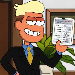

In [149]:
array_to_img(var1[1])

In [147]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [134]:
cm=confusion_matrix(y_pred=pred,y_true=label)

In [135]:
IC

__main__.IdentityClassifier

In [136]:
conf_labels

[1, 0]

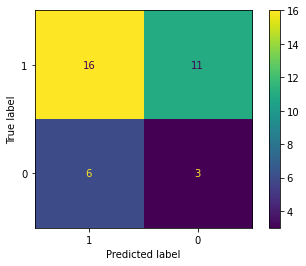

In [139]:
# conf_labels= [1,0]
# IC = type('IdentityClassifier', (), {"predict": lambda i : i, "_estimator_type": "classifier"})

# import itertools

# plot_confusion_matrix(estimator=IC,X=test_generator5.classes,y_true=pred,labels=conf_labels,normalize=None)

from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

conf_labels= [1,0]
IC = type('IdentityClassifier', (), {"predict": lambda i : i, "_estimator_type": "classifier"})

import itertools

plot_confusion_matrix(IC,test_generator5.classes,pred,conf_labels,None)

test_generator5.class_indices

In [138]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

# confusion_matrix(pred,label)
# plot_confusion_matrix(y_pred=pred,y_true=label)